## 1
a) $H(z) = \frac{z}{z - a} + \frac{z}{z - b}$\
b) Poles: $z = {a, b}$,
Zeros: $z= {0}$\
c) Converges for $|a| < |z| < |b|$\
d) Not causal since the ROC of this system is not right-sided.

## 1e)

In [ ]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def H_1(z, a, b):
  return z/(z - a) +  z/(z - b)

In [ ]:
a = 0.5
b = 1.5
w = np.linspace(-np.pi, np.pi, 1000)
z = np.e **(1j * w)
H_z = H_1(z, a, b)

Text(0, 0.5, '$|H(e^{i \\omega}|$')

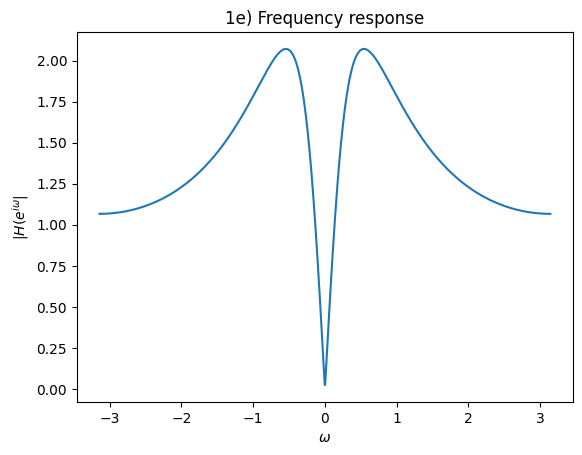

In [ ]:
plt.plot(w, abs(H_z))
plt.title("1e")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(e^{i \omega}|$')

It appears that the fundamental frequency will get zeroed out, but frequencies generally close to it will remain stronger.

## 2
a) Poles: $z = {\pm 0.5}$,
Zeros: $z = {\pm 1}$\
b) $y[n + 2] - 0.25*y[n] = x[n + 2] - x[n]$

## 2c)

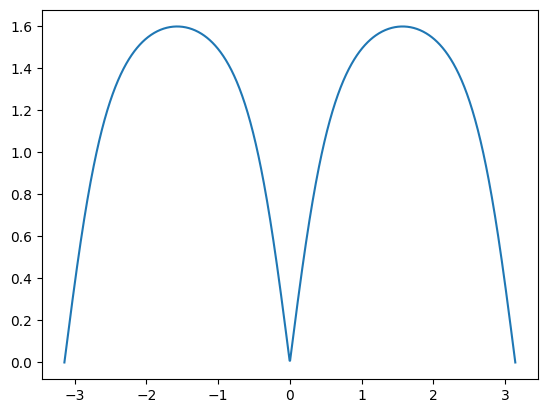

In [ ]:
H_2 = lambda z: (z - 1)*(z + 1)/((z - 0.5)*(z + 0.5))

Text(0, 0.5, '$|H(e^{i \\omega}|$')

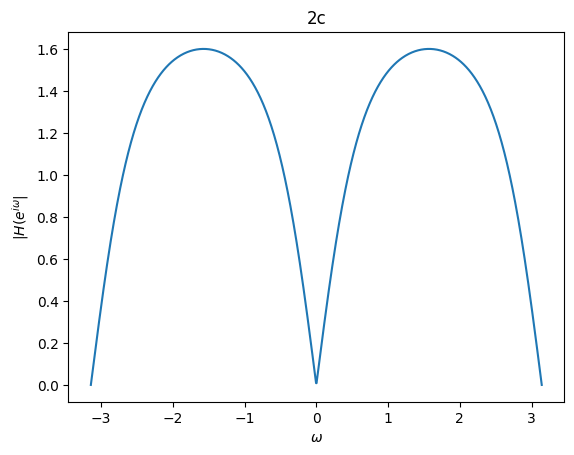

In [ ]:
plt.plot(w, np.abs(H_2(z)))
plt.title("2c")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(e^{i \omega}|$')

Frequencies in between multiples of the fundamental frequency will be most present.

## 2d)

In [ ]:
L = 100

In [ ]:
def LCCDE(omega, L):
  n = np.arange(L)
  x = np.sin(omega * n)
  y = np.zeros(L, dtype=complex)
  for i in range(2, L):
    y[i] = 0.25*y[i - 2]+x[i]-x[i-2]
  return y

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '$|H(e^{i \\omega}|$')

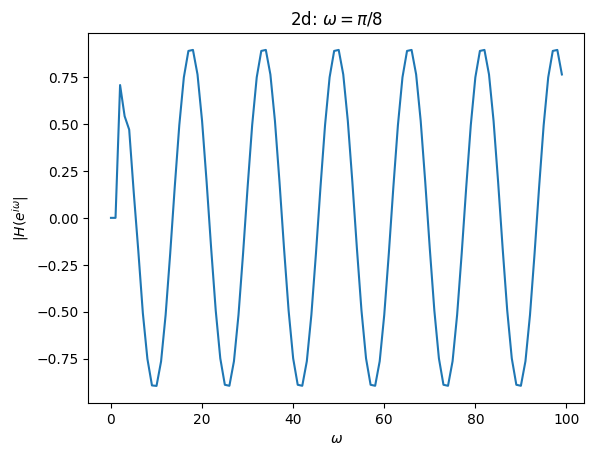

In [ ]:
omega = math.pi/8
y = LCCDE(omega, L)
plt.plot(np.arange(L), y)
plt.title("2d: $\omega = \pi/8$")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(e^{i \omega}|$')

In [ ]:
print("Expected magnitude scaling: ", np.abs(H_2(np.e **(1j * omega))))
print("Expected phase shift: ", np.angle(H_2(np.e **(1j * omega))))

Expected magnitude scaling:  0.9089979239536471
Expected phase shift:  0.9665722550727381


Text(0, 0.5, '$|H(e^{i \\omega}|$')

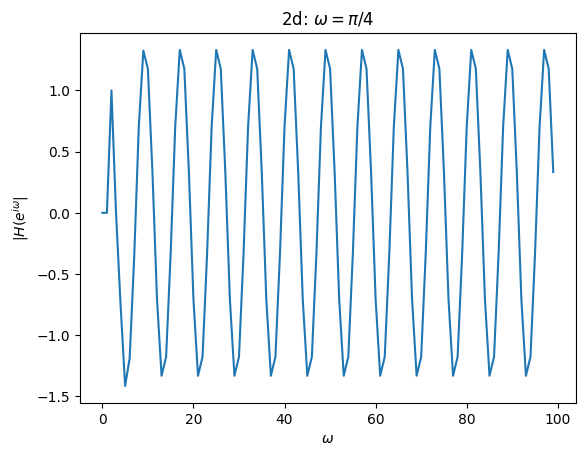

In [ ]:
omega = math.pi/4
y = LCCDE(omega, L)
plt.plot(np.arange(L), y)
plt.title("2d: $\omega = \pi/4$")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(e^{i \omega}|$')

In [ ]:
print("Expected magnitude scaling: ", np.abs(H_2(np.e **(1j * omega))))
print("Expected phase shift: ", np.angle(H_2(np.e **(1j * omega))))

Expected magnitude scaling:  1.3719886811400708
Expected phase shift:  0.5404195002705842


Text(0, 0.5, '$|H(e^{i \\omega}|$')

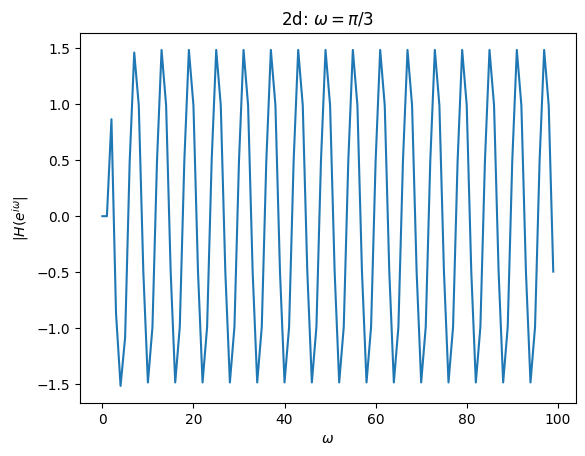

In [ ]:
omega = math.pi/3
y = LCCDE(omega, L)
plt.plot(np.arange(L), y)
plt.title("2d: $\omega = \pi/3$")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(e^{i \omega}|$')

In [ ]:
print("Expected magnitude scaling: ", np.abs(H_2(np.e **(1j * omega))))
print("Expected phase shift: ", np.angle(H_2(np.e **(1j * omega))))

Expected magnitude scaling:  1.5118578920369088
Expected phase shift:  0.3334731722518321


The LCCDE appears like shifted and scaled sinusoids.

In [ ]:
def exp_ave(x, g):
    y = np.zeros_like(x)
    for i in range(1, len(x)):
        y[i] = (1 - g) * x[i] + g * y[i - 1]
    return y

In [ ]:
def MAE(x, y):
  L = len(x)
  res = 0
  for i in range(1, L - 1):
    res += abs(x[i] - y[i - 1])
  return res / (L - 1)

In [ ]:
cville_temps = np.genfromtxt("cville-temps.csv", delimiter= ',')

In [ ]:
g = 0.25
cville_temps_exp_ave = exp_ave(cville_temps, g)
pred_temps = np.zeros_like(cville_temps)
for i in range(1, len(cville_temps)):
  pred_temps[i] = cville_temps_exp_ave[i - 1]

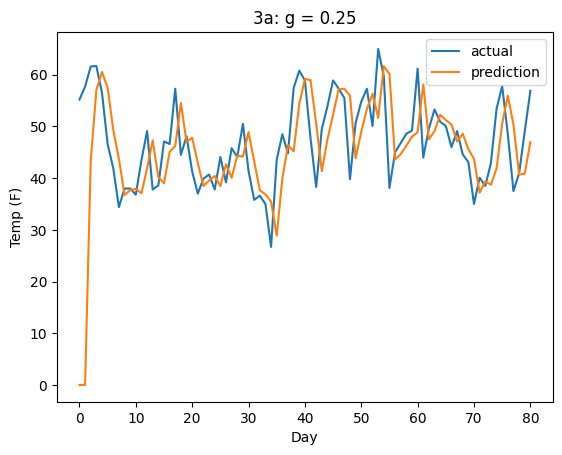

In [ ]:
plt.plot(cville_temps, label = "actual")
plt.plot(pred_temps, label = "prediction")
plt.title("3a: g = 0.25")
plt.xlabel("Day")
plt.ylabel("Temp (F)")
plt.legend()
plt.show()

In [ ]:
print("For g = 0.25, MAE = ", MAE(cville_temps, pred_temps))

For g = 0.25, MAE =  8.873739669127135


In [ ]:
g = 0.5
cville_temps_exp_ave = exp_ave(cville_temps, g)
pred_temps = np.zeros_like(cville_temps)
for i in range(1, len(cville_temps)):
  pred_temps[i] = cville_temps_exp_ave[i - 1]

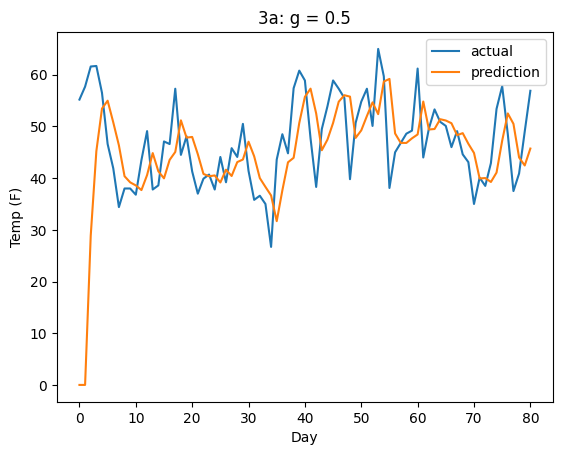

In [ ]:
plt.plot(cville_temps, label = "actual")
plt.plot(pred_temps, label = "prediction")
plt.title("3a: g = 0.5")
plt.xlabel("Day")
plt.ylabel("Temp (F)")
plt.legend()
plt.show()

In [ ]:
print("For g = 0.5, MAE = ", MAE(cville_temps, pred_temps))

For g = 0.5, MAE =  8.777985316541958


In [ ]:
g = 0.75
cville_temps_exp_ave = exp_ave(cville_temps, g)
pred_temps = np.zeros_like(cville_temps)
for i in range(1, len(cville_temps)):
  pred_temps[i] = cville_temps_exp_ave[i - 1]

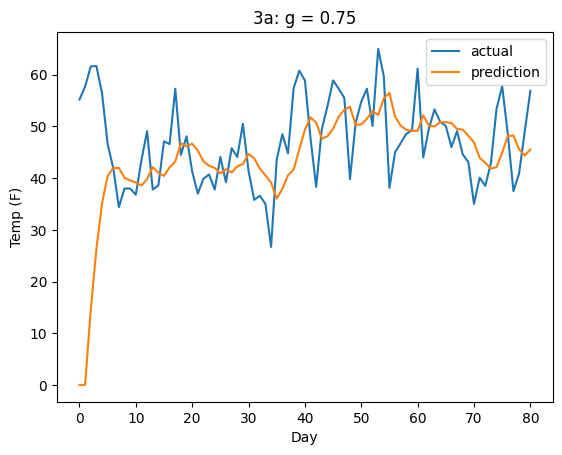

In [ ]:
plt.plot(cville_temps, label = "actual")
plt.plot(pred_temps, label = "prediction")
plt.title("3a: g = 0.75")
plt.xlabel("Day")
plt.ylabel("Temp (F)")
plt.legend()
plt.show()

In [ ]:
print("For g = 0.75, MAE = ", MAE(cville_temps, pred_temps))

For g = 0.75, MAE =  8.542113719443133


g = 0.75 gave the lowest MAE. The higher gains relied too heavily on the previous days weather, which is why the prediction graph looks like a shifted version of the actual graph.